<a href="https://colab.research.google.com/github/pp2098/House-Price-Prediction/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = {'Area':[2600,3000,3200,3600,4000],
        'Bedrooms':[3,4,3,3,5],
        'Age':[20,15,18,30,8],
        "Rate":[550000,565000,61000,595000,760000]
        }
df=pd.DataFrame(data)
df


,Area,Bedrooms,Age,Rate
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,61000
3,3600,3,30,595000
4,4000,5,8,760000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Area      5 non-null      int64
 1   Bedrooms  5 non-null      int64
 2   Age       5 non-null      int64
 3   Rate      5 non-null      int64
dtypes: int64(4)
memory usage: 288.0 bytes


In [ ]:
df.describe()

,Area,Bedrooms,Age,Rate
count,5.000000,5.000000,5.00000,5.000000
mean,3280.000000,3.600000,18.20000,506200.000000
std,540.370243,0.894427,8.01249,262620.829334
min,2600.000000,3.000000,8.00000,61000.000000
25%,3000.000000,3.000000,15.00000,550000.000000
50%,3200.000000,3.000000,18.00000,565000.000000
75%,3600.000000,4.000000,20.00000,595000.000000
max,4000.000000,5.000000,30.00000,760000.000000


In [ ]:
import math
median_bed=math.floor(df['Bedrooms'].median())
median_bed


3

In [ ]:
df.Bedrooms.fillna(median_bed)


0    3
1    4
2    3
3    3
4    5
Name: Bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


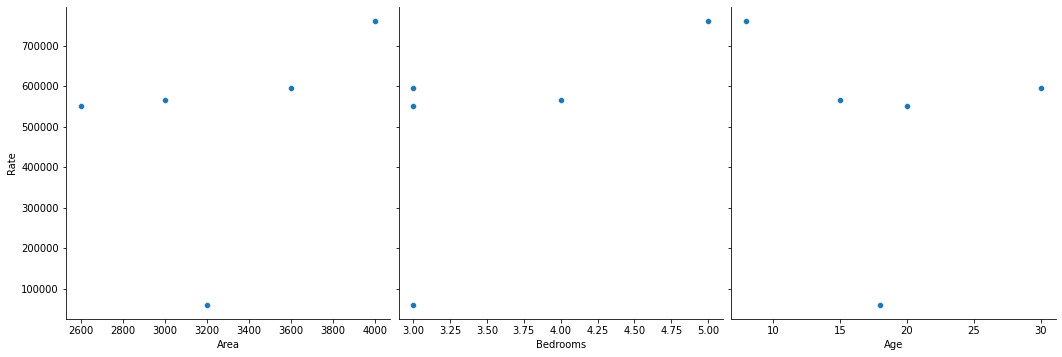

In [ ]:
sns.pairplot(df,x_vars=['Area','Bedrooms','Age'],y_vars=['Rate'],size=5,kind="scatter")
plt.show()

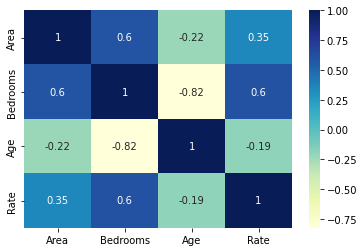

In [ ]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['Area','Bedrooms','Age']]
y= df['Rate']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=5)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

13597637.487626126
[ -5603.49568539  77150.43146117 231283.18951294]


In [ ]:
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

1.0
-2947.1660730591357


In [ ]:
#price=coeff1*Age+coeff2*Bedrooms+coeff3*ARea+inter
lm.predict([[3000,3,15]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([487849.56853883])